
Object Detection From TF2 Checkpoint
====================================


In [2]:
!git clone https://rochana_rumalshan@bitbucket.org/rochana_rumalshan/bankchecks.git

Cloning into 'bankchecks'...
remote: Counting objects: 2032, done.
remote: Compressing objects: 100% (1533/1533), done.
remote: Total 2032 (delta 478), reused 2014 (delta 475)/s    
Receiving objects: 100% (2032/2032), 148.42 MiB | 8.04 MiB/s, done.
Resolving deltas: 100% (478/478), done.
Checking out files: 100% (1910/1910), done.


In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Tue Jan 19 11:47:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# !ls
!pwd
import os
os.getcwd()

/content


'/content'

In [ ]:
%cd /content/bankchecks/
!ls

/content/bankchecks
models	scripts  workspace


In [ ]:
import os
import glob

path = './workspace/training_demo/images/test/lemos'
out_path = './workspace/training_demo/images/result'
attempt = '_i'
files = os.listdir(path)

image_paths = []

for f in glob.glob(path+'/*.jpg'):
   out_filename = out_path+f[f.find('test/')+4:f.find('.jpg')]+attempt+'.jpg'
   print("image path : "+f)
   image_paths.append(str(f))
   print("output path : "+out_filename)
print(image_paths)

IMAGE_PATHS = image_paths

print(IMAGE_PATHS)

image path : ./workspace/training_demo/images/test/lemos/Sample 3.jpg
output path : ./workspace/training_demo/images/result/lemos/Sample 3_i.jpg
image path : ./workspace/training_demo/images/test/lemos/Sample 4.jpg
output path : ./workspace/training_demo/images/result/lemos/Sample 4_i.jpg
image path : ./workspace/training_demo/images/test/lemos/Sample 5.jpg
output path : ./workspace/training_demo/images/result/lemos/Sample 5_i.jpg
image path : ./workspace/training_demo/images/test/lemos/Sample 7.jpg
output path : ./workspace/training_demo/images/result/lemos/Sample 7_i.jpg
image path : ./workspace/training_demo/images/test/lemos/Sample 6.jpg
output path : ./workspace/training_demo/images/result/lemos/Sample 6_i.jpg
['./workspace/training_demo/images/test/lemos/Sample 3.jpg', './workspace/training_demo/images/test/lemos/Sample 4.jpg', './workspace/training_demo/images/test/lemos/Sample 5.jpg', './workspace/training_demo/images/test/lemos/Sample 7.jpg', './workspace/training_demo/images/

In [ ]:
!ls
!pwd
PATH_TO_MODEL_DIR = './workspace/training_demo/exported-models/bankCheck_exported_model_2020_12_25'

print(PATH_TO_MODEL_DIR)

models	scripts  workspace
/content/bankchecks
./workspace/training_demo/exported-models/bankCheck_exported_model_2020_12_25


In [ ]:
!pwd

/content/bankchecks


In [ ]:
# PATH_TO_LABELS = './workspace/training_demo/exported-models/training_demo/annotations/label_map.pbtxt'
# LABEL_FILENAME = 'label_map.pbtxt'
PATH_TO_LABELS = './workspace/training_demo/annotations/label_map.pbtxt'
LABEL_FILENAME = 'label_map.pbtxt'


## **install required libraries**



In [ ]:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

!pip install -q Cython contextlib2 pillow lxml matplotlib

!pip install -q pycocotools

!sudo apt install tesseract-ocr
!pip install pytesseract

Selecting previously unselected package python-bs4.
(Reading database ... 145483 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [ ]:
!pip install tf_slim

     |████████████████████████████████| 358kB 12.9MB/s 


In [ ]:
!pip install tf-models-official

     |████████████████████████████████| 1.1MB 8.8MB/s 
     |████████████████████████████████| 358kB 33.9MB/s 
     |████████████████████████████████| 102kB 13.1MB/s 
     |████████████████████████████████| 276kB 28.7MB/s 
     |████████████████████████████████| 174kB 16.3MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 37.6MB 84kB/s 
     |████████████████████████████████| 1.2MB 54.4MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-cp36-none-any.whl size=20072 sha256=aa0e76cff6cb2a3f3065d69a655445024b3c055a8275260bcec21d833f7c20a2
  Stored in directory: /root/.cache/pip/wheels/f1/93/7b/127daf0c3a5a49feb2fecd468d508067c733fba5192f726ad1
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=1a7ac82d12a0f996679d4923f90b15b72dd4a3a6b4e94ebf3610a864b59026ff
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for se

In [ ]:
# !pip freeze

## **load the trained model**

In [ ]:
!pwd

/content/bankchecks


In [ ]:
%cd models/research/
!ls

/content/bankchecks/models/research
a3c_blogpost	    cvt_text	   lstm_object_detection  rebar
adversarial_text    deeplab	   marco		  setup.py
attention_ocr	    deep_speech    nst_blogpost		  slim
audioset	    delf	   object_detection	  vid2depth
autoaugment	    efficient-hrl  pcl_rl
cognitive_planning  lfads	   README.md


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!pwd

/content/bankchecks/models/research


In [ ]:
%cd /content/bankchecks

/content/bankchecks


In [ ]:
import time
import tensorflow as tf

import sys
sys.path.append('/content/bankchecks/models/research')

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

PATH_TO_CFG = PATH_TO_MODEL_DIR + "/pipeline.config"
PATH_TO_CKPT = PATH_TO_MODEL_DIR + "/checkpoint"

print('Loading model... ', end='')
start_time = time.time()

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CFG)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(PATH_TO_CKPT, 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model... Done! Took 5.475822687149048 seconds


In [ ]:
category_index = label_map_util.create_category_index_from_labelmap("/content/bankchecks/workspace/training_demo/annotations/label_map.pbtxt",
                                                                    use_display_name=True)
print(category_index)

{1: {'id': 1, 'name': 'amountWord'}, 2: {'id': 2, 'name': 'amountNumber'}, 3: {'id': 3, 'name': 'date'}, 4: {'id': 4, 'name': 'validPeriod'}, 5: {'id': 5, 'name': 'ABArouting'}, 6: {'id': 6, 'name': 'signature'}}


In [ ]:
 %matplotlib inline

In [ ]:
!pwd
%cd /content/bankchecks/workspace/training_demo/images/
!pwd
!mkdir result
!ls
%cd /content/bankchecks

/content/bankchecks
/content/bankchecks/workspace/training_demo/images
/content/bankchecks/workspace/training_demo/images
result	test
/content/bankchecks


Sample 3
Running inference for ./workspace/training_demo/images/test/lemos/Sample 3.jpg... 100
./workspace/training_demo/images/result/Sample 3att_1.png
Done


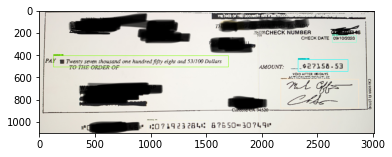

Sample 4
Running inference for ./workspace/training_demo/images/test/lemos/Sample 4.jpg... 100
./workspace/training_demo/images/result/Sample 4att_1.png
Done


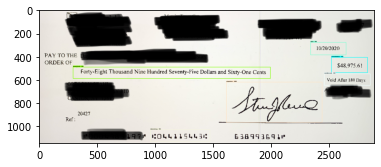

Sample 5
Running inference for ./workspace/training_demo/images/test/lemos/Sample 5.jpg... 100
./workspace/training_demo/images/result/Sample 5att_1.png
Done


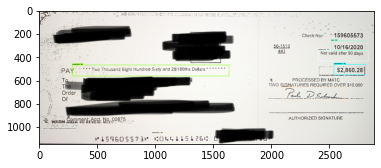

Sample 7
Running inference for ./workspace/training_demo/images/test/lemos/Sample 7.jpg... 100
./workspace/training_demo/images/result/Sample 7att_1.png
Done


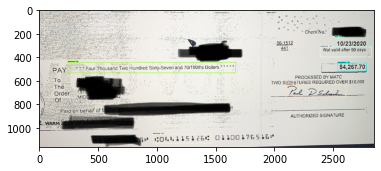

Sample 6
Running inference for ./workspace/training_demo/images/test/lemos/Sample 6.jpg... WARNING:tensorflow:5 out of the last 5 calls to <function detect_fn at 0x7ff1f8cc6f28> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
100
./workspace/training_demo/images/result/Sample 6att_1.png
Done


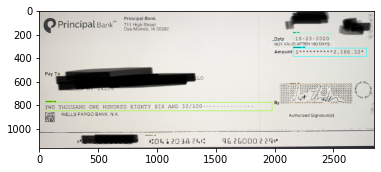

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
import cv2
import itertools  

warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

i = 0
all_image_inferences = {}
for image_path in IMAGE_PATHS:
    #here image_name is the ma,e of the image without file extension (file type) 
    image_name = image_path[image_path.rfind('/')+1:image_path.rfind('.')]

    print(image_name)

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    image_height = image_np.shape[0] #multiply with xmin and xmax
    image_width = image_np.shape[1] #multiply with ymin and ymax


    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.uint8)


    print(len(detections['detection_boxes']))
    # since classes detected based on 0 base have to add the label_id_offset to the detected number
    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.25,
            agnostic_mode=False)

    
    # textFileName3 = output_path[:output_path.find('.jpg')]+"_3.txt"
    output_path_text_file = out_path+'/'+image_name+'_att_1.txt'
    
    bboxes_list = []

    with open(output_path_text_file, 'w') as filehandle:
        for (detec,cls,scr) in zip(detections['detection_boxes'],detections['detection_classes'],detections['detection_scores']):
            # [xmin, ymin, xmax, ymax, class, prob.score]
           
            # list_temp = [int(detec[0]*image_width),int(detec[1]*image_height),int(detec[2]*image_width),int(detec[3]*image_height),cls,scr]
            # list_temp = [np.int64(detec[0]*image_width),np.int64(detec[1]*image_height),np.int64(detec[2]*image_width),np.int64(detec[3]*image_height),cls,scr]
            # [ymin, xmin, ymax, xmax, class, prob.score]
            list_temp = [np.int64(detec[0]*image_height),np.int64(detec[1]*image_width),np.int64(detec[2]*image_height),np.int64(detec[3]*image_width),cls,scr]
            
            bboxes_list.append(list_temp)
            # print(np.int64(detec[0]*image_width))

            textLine = str(list_temp[0])+" " +str(list_temp[1])+" " +str(list_temp[2])+" " +str(list_temp[3])+" " +str(scr)+" " +str(cls)
            filehandle.write('%s\n' % textLine)

    all_image_inferences.update({image_name:bboxes_list})

    # print(image_np_with_detections)
    plt.figure()
    plt.imshow(image_np_with_detections)
    # plt.savefig('test1234{}_.png'.format(i),dpi=300)
    # output_path_ = out_path+'/'+image_name+'att{}_.png'.format(i)
    output_path_ = out_path+'/'+image_name+'att_1.png'
    print(output_path_)
    viz_utils.save_image_array_as_png(image_np_with_detections,output_path_)
    # cv2.imwrite('test1234{}.jpg'.format[i],image_np_with_detections)
    print('Done')
    i +=1
    plt.show()


In [ ]:
print(all_image_inferences.keys())

dict_keys(['Sample 3', 'Sample 4', 'Sample 5', 'Sample 7', 'Sample 6'])


In [ ]:
print(all_image_inferences)

{'Sample 3': [[618, 2172, 875, 2873, 5, 0.9916577], [987, 972, 1089, 1521, 4, 0.97058445], [531, 2262, 601, 2614, 3, 0.9172887], [229, 2634, 288, 2852, 2, 0.8828516], [443, 2327, 548, 2777, 1, 0.821825], [408, 129, 508, 1703, 0, 0.37536138], [232, 2332, 289, 2620, 2, 0.15484042], [618, 2172, 875, 2873, 4, 0.15026899], [231, 2511, 293, 2851, 2, 0.123749964], [618, 2172, 875, 2873, 1, 0.11757912], [231, 2511, 293, 2851, 3, 0.11067764], [488, 2298, 581, 2658, 3, 0.1071359], [234, 2608, 309, 2864, 2, 0.09608387], [233, 2386, 292, 2779, 3, 0.092847966], [777, 335, 904, 1467, 0, 0.09207168], [412, 150, 565, 1560, 0, 0.079549305], [233, 2386, 292, 2779, 2, 0.0784487], [531, 2262, 601, 2614, 0, 0.07630424], [984, 977, 1092, 1523, 5, 0.066849805], [229, 2635, 287, 2854, 0, 0.06657144], [229, 2633, 288, 2854, 5, 0.06177452], [3, 35, 36, 367, 2, 0.06157869], [397, 623, 522, 1685, 0, 0.060013697], [443, 2327, 548, 2777, 4, 0.059481308], [532, 2265, 601, 2610, 1, 0.05783656], [443, 2327, 548, 2777,

In [ ]:
!pip install pyspellchecker

In [ ]:
import cv2
# from tkinter import filedialog
# from tkinter import * 
import numpy as np
from PIL import Image
import pandas as pd

import matplotlib.pyplot as plt

from PIL import Image
import pytesseract
# import argparse
import cv2
import os

from spellchecker import SpellChecker

spell = SpellChecker(distance=1)  # set at initialization

# pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

FILTERING_THRESH = 0.3

CLASSES = {1: {'id': 1, 'name': 'amountWord'}, 2: {'id': 2, 'name': 'amountNumber'}, 3: {'id': 3, 'name': 'date'}, 4: {'id': 4, 'name': 'validPeriod'}, 5: {'id': 5, 'name': 'ABArouting'}, 6: {'id': 6, 'name': 'signature'}}

#dictionaries
amountWords = {}
amountNumbers = {}
dates = {}
validPeriods = {}
ABAroutings = {}
signatures = {}

#colors
AMOUNTWORD_C = (24,24,169)
AMOUNTNUMBER_C = (233,82,82)
DATE_C = (112,8,8)
VALIDPERIOD_C = (193,24,193)
ABAROUTING_C = (63,169,9)
SIGNATURE_C = (21,218,249)

#detection filtering threshold values
AMOUNT_WORD_THRESH = 0.25
AMOUNT_NUMMBER_THRESH = 0.5
DATE_THRESH = 0.5
VALID_PERIOD_THRESH = 0.5
ABA_THRESH = 0.5
SIGNATURE_THRESH = 0.5


CHARACTERLIST_FOR_ALPHA_NUMERIC = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","Y","X","Y","Z",\
                "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","y","x","y","z",\
                "1","2","3","4","5","6","7","8","9","0"]

CHARACTERLIST_FOR_AMOUNT_WORD = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","Y","W","X","Y","Z",\
                "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","y","w","x","y","z",\
                "1","2","3","4","5","6","7","8","9","0","-","—","_"]

CHARACTERLIST_FOR_DATE = ["1","2","3","4","5","6","7","8","9","0","-","/","l"]

# CHARACTERLIST_FOR_DATE = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","Y","X","Y","Z",\
#                 "1","2","3","4","5","6","7","8","9","0","-","/","l"]

CHARACTERLIST_FOR_NUMERIC = ["1","2","3","4","5","6","7","8","9","0"]

CHARACTERLIST_FOR_AMOUNT_NUMBER = ["1","2","3","4","5","6","7","8","9","0",".",",","-"]

CHARACTERLIST_FOR_ALPHA_ONLY = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","Y","X","Y","Z",\
                "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","y","x","y","z"]

CHARACTERLIST = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","Y","X","Y","Z",\
                "a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","y","x","y","z",\
                "1","2","3","4","5","6","7","8","9","0","-",".",",","/","_","="]
    
WORD_LIST_FOR_AMOUNT_WORD = ["and","eight","eighteen","eighty","eleven","fifteen","fifty","five","forty",\
                             "four","fourteen","hundred","hundredth","million","nine","nineteen","ninety",\
                                 "one","seven","seventeen","seventy","six","sixteen","sixty","ten","thirteen",\
                                     "thirty","thousand","three","trillion","twelve","twenty","two","dollars","cents"]



spell.word_frequency.load_words(WORD_LIST_FOR_AMOUNT_WORD)

def read_class_names(class_file_name):
    # loads class name from a file
    names = {}
    with open(class_file_name, 'r') as data:
        for ID, name in enumerate(data):
            names[ID] = name.strip('\n')
    return names

def convert_image_dtype(img, target_type_min, target_type_max, target_type):
    imin = img.min()
    imax = img.max()

    a = (target_type_max - target_type_min) / (imax - imin)
    b = target_type_max - a * imax
    new_img = (a * img + b).astype(target_type)
    return new_img

#pre processing functions
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((3,3),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((3,3),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

#Split string into characters 
def split(word): 
    return [char for char in word]  


def is_valid_character(ch,object_type):
    if(object_type==1):
        if ch in CHARACTERLIST_FOR_ALPHA_NUMERIC:
            return 1
        else:
            return 0
    elif(object_type==2):
        if ch in CHARACTERLIST_FOR_AMOUNT_NUMBER:
            return 1
        else:
            return 0
    elif(object_type==3):
        if ch in CHARACTERLIST_FOR_DATE:
            return 1
        else:
            return 0    
    elif(object_type in (4,5,6)):
        if ch in CHARACTERLIST_FOR_NUMERIC:
            return 1
        else:
            return 0     
        

def extract_only_valid_characters(text,object_class):
    #filter non-alphanumeric chracters
    print('\n\nfiltering test')
    words = text.split()
    print(words)
    print('filtering test\n\n')
    
    final_text = ""
    for word in words:
        word_1 = split(word)
        print('word_1')
        print(word_1)
        new_word = ''
        for c in word_1:
            if(is_valid_character(c,object_class) == 1): # checking if indiviual chr is alphanumeric or not
                new_word = new_word + c    
        final_text = final_text+ " " +new_word
        
    #return read_text
    print('\n\nfinal_text test')
    print(final_text)
    print('final_text test\n\n')
        
    return final_text

def word_filtering_amount_word(text,object_class):
    text = text.replace("-", " ")
    words = text.split()
    full_text = ""
    misspelled = spell.unknown(words)
    print(misspelled)
    
    for word in misspelled:
        print(spell.correction(word))
        word1 = spell.correction(word)
        text.replace(word, word1)
        
    words = text.split()    
    for word in words:
        print(spell.correction(word))
        word = spell.correction(word)
        if word.lower() in WORD_LIST_FOR_AMOUNT_WORD:
            full_text = full_text + word+" "
    print(full_text)
    
    return full_text

def ocr_further_processing(img,roi_boundary,base_image_width,object_class): #image and a tuple

    (_, thresh) = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    unsharp_image = thresh

    plt.figure()
    # plt.imshow(cv2.cvtColor(unsharp_image, cv2.COLOR_GRAY2RGB))
    plt.imshow(unsharp_image)
    plt.show()
        
    # kernel = np.ones((3,3),np.uint8)
    # eroded = cv2.erode(unsharp_image,kernel,iterations = 1) #white pixels gets eroded
    
    plt.figure()
    plt.imshow(thresh)
    plt.show()
    
    return thresh


def read_text_using_ocr(image,ROI,object_class = 3):  #{1:'amountWord'}, 2:'amountNumber'}, 3: 'date'}, 4:'validPeriod'}, 5: 'ABArouting'}, 6: 'signature'
    
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # (thresh, gray) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # (_, thresh) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    (y1,x1,y2,x2) = ROI
    bound = [y1,x1,y2,x2]
    
    # ROI_12 = thresh[y1:y2,x1:x2] #important
    ROI_12 = gray[y1:y2,x1:x2] #important
    
    # removing grid like distortions
    ROI_12 = ocr_further_processing(ROI_12,bound,image.shape[1],object_class)
	
    #custom_config = r'--oem 3 --psm 6'
    custom_config = r'--oem 3 --psm 12'
  
    if object_class == 1:
        # custom_config = r'--oem 3 --psm 12 -l eng'
        custom_config = r'--oem 3 --psm 12'
        read_text = pytesseract.image_to_string(ROI_12, config=custom_config)
    elif object_class ==2:
        # custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=0123456789,.$'
        custom_config = r'--oem 3  --psm 12'
        read_text = pytesseract.image_to_string(ROI_12, config=custom_config)
    elif object_class ==3:
        # custom_config = r'--oem 3 --psm 8 -c tessedit_char_whitelist=0123456789,.$'
        custom_config = r'--oem 3  --psm 12'
        read_text = pytesseract.image_to_string(ROI_12, config=custom_config)
    else:
        read_text = pytesseract.image_to_string(ROI_12, config=custom_config)
    # read_text = pytesseract.image_to_string(ROI_12, config=custom_config)
    
    final_text = extract_only_valid_characters(read_text,object_class)
    
    if object_class == 1:
        final_text = word_filtering_amount_word(final_text,1)
    
    pltImage = np.copy(ROI_12) 
    pltImage = cv2.cvtColor(pltImage, cv2.COLOR_BGR2RGB) 
    plt.figure()
   
    plt.imshow(pltImage)
    plt.text(0.1, 0.9,final_text, size=15, color='red')
    plt.show()
    
    imFileName = "test_{}.jpg".format(object_class)
    
    # cv2.imwrite(imFileName,pltImage)
    
    return final_text
    

all_results = {}   
def main_(filename,image_name_new_):
    all_components = {}
    all_read_texts = {}
    lemos_index=0 #number of detected components
    
    amountWords = {}
    amountNumbers = {}
    dates = {}
    validPeriods = {}
    ABAroutings = {}
    signatures = {}
    
    print(CLASSES)
    
    test1 = cv2.imread(filename,cv2.IMREAD_COLOR)

    #for the ease of ocr process make a permannet copy of the image
    test1copy = np.copy(test1)
    
    #extracting bboxes details into a list of lists
    bboxes_list = all_image_inferences[image_name_new_]
    
    print(bboxes_list)
    
    #producing dictionries for seperate classes
    for item in bboxes_list:
        category_index = int(item[4]+1)
        #CLASSES = {1: {'id': 1, 'name': 'amountWord'}, 2: {'id': 2, 'name': 'amountNumber'}, 3: {'id': 3, 'name': 'date'}, 4: {'id': 4, 'name': 'validPeriod'}, 5: {'id': 5, 'name': 'ABArouting'}, 6: {'id': 6, 'name': 'signature'}}
        # category_index = item[4]+1   # 0 based nisa
        #ymin,xmin,ymax,xmax,probabality_score,category_index,category
        coord_and_class = [item[0],item[1],item[2],item[3],item[5],category_index,CLASSES[category_index]['name']]
                
        #--- amountWord --- #
        if category_index == 1: #amountWord
            amountWord_id = 'aW_1'
            #filtering the detected bounding boxes using a pre deifened threshold value
            if float(item[5])>AMOUNT_WORD_THRESH:
                if amountWords=={}:
                    amountWords.update({amountWord_id:coord_and_class})
                    all_components.update({'amountWord':coord_and_class})
                    lemos_index+=1
                    # print(amountWords)
                else:
                    if float(item[5])>float(amountWords[amountWord_id][4]):
                        # print("new amountWord")
                        amountWords.update({amountWord_id:coord_and_class})
                        all_components.update({'amountWord':coord_and_class})
                        lemos_index+=1
                        
        
        #--- amountNumber --- #
        if category_index == 2: #amountNumber
            amountNumber_id = 'aN_1'
            #filtering the detected bounding boxes using a pre deifened threshold value
            if float(item[5])>AMOUNT_NUMMBER_THRESH:
                if amountNumbers=={}:
                    amountNumbers.update({amountNumber_id:coord_and_class})
                    all_components.update({'amountNumber':coord_and_class})
                    lemos_index+=1
                    # print(amountNumbers)
                else:
                    if float(item[5])>float(amountNumbers[amountNumber_id][4]):
                        # print("new amountWord")
                        amountNumbers.update({amountNumber_id:coord_and_class})
                        all_components.update({'amountNumber':coord_and_class})
                        lemos_index+=1
                        
        #--- date --- #
        if category_index == 3: #date
            date_id = 'dt_1'
            #filtering the detected bounding boxes using a pre deifened threshold value
            if float(item[5])>DATE_THRESH:
                if dates=={}:
                    dates.update({date_id:coord_and_class})
                    all_components.update({'date':coord_and_class})
                    lemos_index+=1
                    # print(dates)
                else:
                    if float(item[5])>float(dates[date_id][4]):
                        # print("new amountWord")
                        dates.update({date_id:coord_and_class})
                        all_components.update({'date':coord_and_class})
                        lemos_index+=1
        
        #--- validPeriod --- #
        if category_index == 4: #validPeriod
            validPeriod_id = 'vp_1'
            #filtering the detected bounding boxes using a pre deifened threshold value
            if float(item[5])>VALID_PERIOD_THRESH:
                if validPeriods=={}:
                    validPeriods.update({validPeriod_id:coord_and_class})
                    all_components.update({'validPeriod':coord_and_class})
                    lemos_index+=1
                    # print(validPeriods)
                else:
                    if float(item[5])>float(validPeriods[validPeriod_id][4]):
                        # print("new amountWord")
                        validPeriods.update({validPeriod_id:coord_and_class})
                        all_components.update({'validPeriod':coord_and_class})
                        lemos_index+=1
                        
        #--- ABArouting --- #
        if category_index == 5: #ABArouting
            ABArouting_id = 'aba_1'
            #filtering the detected bounding boxes using a pre deifened threshold value
            if float(item[5])>ABA_THRESH:
                if ABAroutings=={}:
                    ABAroutings.update({ABArouting_id:coord_and_class})
                    all_components.update({'ABArouting':coord_and_class})
                    lemos_index+=1
                    # print(ABAroutings)
                else:
                    if float(item[5])>float(ABAroutings[ABArouting_id][4]):
                        # print("new ABArouting")
                        ABAroutings.update({ABArouting_id:coord_and_class})
                        all_components.update({'ABArouting':coord_and_class})
                        lemos_index+=1
                        
        #--- signature --- #
        if category_index == 6: #signature
            signature_id = 'sg_1'
            #filtering the detected bounding boxes using a pre deifened threshold value
            if float(item[5])>SIGNATURE_THRESH:
                if signatures=={}:
                    signatures.update({signature_id:coord_and_class})
                    all_components.update({'signature':coord_and_class})
                    lemos_index+=1
                    # print(signatures)
                else:
                    if float(item[5])>float(signatures[signature_id][4]):
                        # print("new amountWord")
                        signatures.update({signature_id:coord_and_class})
                        all_components.update({'signature':coord_and_class})
                        lemos_index+=1
        
    #print(mileposts.get('mp_1')[3])
    #print(mileposts['mp_1'][3])
    
    print("\n\nprinting classes seperately\n")
                
    print(amountWords)
    print(amountNumbers)
    print(dates)
    print(validPeriods)
    print(ABAroutings)
    print(signatures)
    
    print("\n\nAll Components\n")
    print(all_components) 
    
    print("\n\nNumber of items detected is --- {}\n".format(lemos_index))     
    
    
    for component in all_components.values():
        ##tensorflow provides cordinates of the format ymin=bbox[0],xmin,ymax,xmax
        (y1, x1), (y2, x2) = (component[0], component[1]), (component[2], component[3])
        ##cv2.rectangle(test1, (x1, y1), (x2, y2), (0,100,200), -1)
        
        print(component)
               
        if(component[5]==1):
            cv2.rectangle(test1, (x1, y1), (x2, y2), AMOUNTWORD_C, 4)#b,g,r
            cv2.putText(test1,'{} : {}%'.format(component[6],round(component[4]*100,2)),(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,1,AMOUNTWORD_C,2)
            read_text_2 = read_text_using_ocr(test1copy,[y1, x1, y2, x2],1)
            read_text_2 = read_text_2.strip()
            all_read_texts.update({'amountWord':read_text_2})
            print("Read text amountWord: --- {}\n".format(read_text_2))
                        
        elif(component[5]==2):
            cv2.rectangle(test1, (x1, y1), (x2, y2), AMOUNTNUMBER_C, 4)
            cv2.putText(test1,'{} : {}%'.format(component[6],round(component[4]*100,2)),(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,1,AMOUNTNUMBER_C,2)
            read_text_2 = read_text_using_ocr(test1copy,[y1, x1, y2, x2],2)
            read_text_2 = read_text_2.strip().replace(" ", "")
            all_read_texts.update({'amountNumber':read_text_2})
            print("Read text amountNumber: --- {}\n".format(read_text_2))
            
        elif(component[5]==3):
            cv2.rectangle(test1, (x1, y1), (x2, y2), DATE_C, 4)
            cv2.putText(test1,'{} : {}%'.format(component[6],round(component[4]*100,2)),(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,1,DATE_C,2)
            read_text_2 = read_text_using_ocr(test1copy,[y1, x1, y2, x2],3)
            read_text_2 = read_text_2.strip().replace(" ", "").replace("l", "1")
            all_read_texts.update({'date':read_text_2})
            print("Read text date: --- {}\n".format(read_text_2))
            
        elif(component[5]==4):
            cv2.rectangle(test1, (x1, y1), (x2, y2), VALIDPERIOD_C, 4)
            cv2.putText(test1,'{} : {}%'.format(component[6],round(component[4]*100,2)),(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,1,VALIDPERIOD_C,2)
            read_text_2 = read_text_using_ocr(test1copy,[y1, x1, y2, x2],4)
            read_text_2 = read_text_2.strip()
            all_read_texts.update({'validPeriod':read_text_2})
            print("Read text validPeriod: --- {}\n".format(read_text_2))
            
        elif(component[5]==5):
            cv2.rectangle(test1, (x1, y1), (x2, y2), ABAROUTING_C, 4)
            cv2.putText(test1,'{} : {}%'.format(component[6],round(component[4]*100,2)),(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,1,ABAROUTING_C,2)
            read_text_2 = read_text_using_ocr(test1copy,[y1, x1, y2, x2],5)
            read_text_2 = read_text_2.strip().replace(" ", "")
            all_read_texts.update({'ABArouting':read_text_2})
            print("Read text ABArouting: --- {}\n".format(read_text_2))
            
        elif(component[5]==6):
            cv2.rectangle(test1, (x1, y1), (x2, y2), SIGNATURE_C, 4)
            cv2.putText(test1,'{} : {}%'.format(component[6],round(component[4]*100,2)),(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,1,SIGNATURE_C,2)
            read_text_2 = read_text_using_ocr(test1copy,[y1, x1, y2, x2],6)
            read_text_2 = read_text_2.strip().replace(" ", "")
            all_read_texts.update({'signature':read_text_2})
            print("Read text signature: --- {}\n".format(read_text_2))            

    #result_final = {}


    ##new file name for the output image
    filename1 = filename[:filename.find('.')]+'_Lemos_1'+ filename[filename.find('.'):] 
    
    ##csv file name
    #filename1_csv = filename[:filename.find('.')]+'_LemosTest_3_further_ii'+'.csv'
    
    print(filename1)
    cv2.imwrite(filename1,test1)
    
    
    print("\nresult_final\n")
    print(all_read_texts)
    print("\nresult_final\n")
    all_results.update({image_name_new_:all_read_texts})    
 


# main()


In [ ]:
filename_ = "./workspace/training_demo/images/test/rVHbk__trans-20_-30__rot-1__blur0.2.jpg"
image_name_new = "rVHbk__trans-20_-30__rot-1__blur0.2"
main_(filename_,image_name_new)

['./workspace/training_demo/images/test/lemos/Sample 3.jpg', './workspace/training_demo/images/test/lemos/Sample 4.jpg', './workspace/training_demo/images/test/lemos/Sample 5.jpg', './workspace/training_demo/images/test/lemos/Sample 7.jpg', './workspace/training_demo/images/test/lemos/Sample 6.jpg']
Sample 3
{1: {'id': 1, 'name': 'amountWord'}, 2: {'id': 2, 'name': 'amountNumber'}, 3: {'id': 3, 'name': 'date'}, 4: {'id': 4, 'name': 'validPeriod'}, 5: {'id': 5, 'name': 'ABArouting'}, 6: {'id': 6, 'name': 'signature'}}
[[618, 2172, 875, 2873, 5, 0.9916577], [987, 972, 1089, 1521, 4, 0.97058445], [531, 2262, 601, 2614, 3, 0.9172887], [229, 2634, 288, 2852, 2, 0.8828516], [443, 2327, 548, 2777, 1, 0.821825], [408, 129, 508, 1703, 0, 0.37536138], [232, 2332, 289, 2620, 2, 0.15484042], [618, 2172, 875, 2873, 4, 0.15026899], [231, 2511, 293, 2851, 2, 0.123749964], [618, 2172, 875, 2873, 1, 0.11757912], [231, 2511, 293, 2851, 3, 0.11067764], [488, 2298, 581, 2658, 3, 0.1071359], [234, 2608, 30

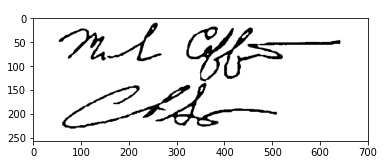

Read text signature: --- 

[987, 972, 1089, 1521, 0.97058445, 5, 'ABArouting']


filtering test
['nOo7,923', 'chu.']
filtering test


word_1
['n', 'O', 'o', '7', ',', '9', '2', '3']
word_1
['c', 'h', 'u', '.']


final_text test
 7923 
final_text test




filtering test
['nOo7,923', 'chu.']
filtering test


word_1
['n', 'O', 'o', '7', ',', '9', '2', '3']
word_1
['c', 'h', 'u', '.']


final_text test
 7923 
final_text test




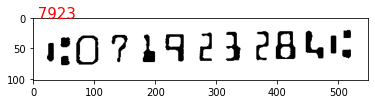

Read text ABArouting: --- 7923

[531, 2262, 601, 2614, 0.9172887, 4, 'validPeriod']


filtering test
['Ne', 'TN', 'Ne', 'a', 'ae', 'SAVG', 'OBI', 'H3LIV', 'GIOA']
filtering test


word_1
['N', 'e']
word_1
['T', 'N']
word_1
['N', 'e']
word_1
['a']
word_1
['a', 'e']
word_1
['S', 'A', 'V', 'G']
word_1
['O', 'B', 'I']
word_1
['H', '3', 'L', 'I', 'V']
word_1
['G', 'I', 'O', 'A']


final_text test
        3 
final_text test




filtering test
['Ne', 'TN', 'Ne', 'a', 'ae', 'SAVG', 'OBI', 'H3LIV', 'GIOA']
filtering test


word_1
['N', 'e']
word_1
['T', 'N']
word_1
['N', 'e']
word_1
['a']
word_1
['a', 'e']
word_1
['S', 'A', 'V', 'G']
word_1
['O', 'B', 'I']
word_1
['H', '3', 'L', 'I', 'V']
word_1
['G', 'I', 'O', 'A']


final_text test
        3 
final_text test




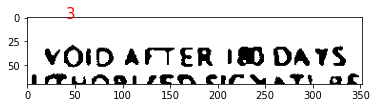

Read text validPeriod: --- 3

[229, 2634, 288, 2852, 0.8828516, 3, 'date']


filtering test
['0910/2020']
filtering test


word_1
['0', '9', '1', '0', '/', '2', '0', '2', '0']


final_text test
 0910/2020
final_text test




filtering test
['0910/2020']
filtering test


word_1
['0', '9', '1', '0', '/', '2', '0', '2', '0']


final_text test
 0910/2020
final_text test




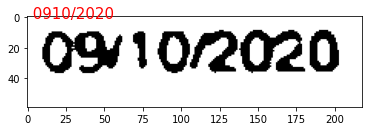

Read text date: --- 0910/2020

[443, 2327, 548, 2777, 0.821825, 2, 'amountNumber']


filtering test
['$27158-53']
filtering test


word_1
['$', '2', '7', '1', '5', '8', '-', '5', '3']


final_text test
 2715853
final_text test




filtering test
['$27158-53']
filtering test


word_1
['$', '2', '7', '1', '5', '8', '-', '5', '3']


final_text test
 2715853
final_text test




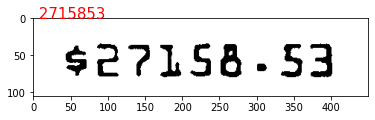

Read text amountNumber: --- 2715853

[408, 129, 508, 1703, 0.37536138, 1, 'amountWord']


filtering test
['Y', 'w', 'Twenn', 'seven', 'thousand', 'one', 'hundred', 'fifty', 'eight', 'and', '53/100', 'Dollars', 'Pe', '79', 'C7X_PrAa', 'rere', 'fF']
filtering test


word_1
['Y']
word_1
['w']
word_1
['T', 'w', 'e', 'n', 'n']
word_1
['s', 'e', 'v', 'e', 'n']
word_1
['t', 'h', 'o', 'u', 's', 'a', 'n', 'd']
word_1
['o', 'n', 'e']
word_1
['h', 'u', 'n', 'd', 'r', 'e', 'd']
word_1
['f', 'i', 'f', 't', 'y']
word_1
['e', 'i', 'g', 'h', 't']
word_1
['a', 'n', 'd']
word_1
['5', '3', '/', '1', '0', '0']
word_1
['D', 'o', 'l', 'l', 'a', 'r', 's']
word_1
['P', 'e']
word_1
['7', '9']
word_1
['C', '7', 'X', '_', 'P', 'r', 'A', 'a']
word_1
['r', 'e', 'r', 'e']
word_1
['f', 'F']


final_text test
 Y  Tenn seven thousand one hundred fifty eight and 53100 Dollars Pe 79 C7XPrAa rere fF
final_text test




filtering test
['Y', 'w', 'Twenn', 'seven', 'thousand', 'one', 'hundred', 'fifty', 'eight', 'and', '53/

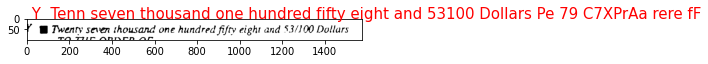

Read text amountWord: --- Y  Tenn seven thousand one hundred fifty eight and 53100 Dollars Pe 79 C7XPrAa rere fF

_Lemos_1./workspace/training_demo/images/test/lemos/Sample 3.jpg

result_final

{'signature': '', 'ABArouting': '7923', 'validPeriod': '3', 'date': '0910/2020', 'amountNumber': '2715853', 'amountWord': 'Y  Tenn seven thousand one hundred fifty eight and 53100 Dollars Pe 79 C7XPrAa rere fF'}

result_final

Sample 4
{1: {'id': 1, 'name': 'amountWord'}, 2: {'id': 2, 'name': 'amountNumber'}, 3: {'id': 3, 'name': 'date'}, 4: {'id': 4, 'name': 'validPeriod'}, 5: {'id': 5, 'name': 'ABArouting'}, 6: {'id': 6, 'name': 'signature'}}
[[620, 1616, 965, 2443, 5, 0.9959864], [278, 2343, 385, 2650, 2, 0.95605266], [1030, 961, 1132, 1475, 4, 0.9484241], [407, 2523, 538, 2835, 1, 0.90811473], [549, 2461, 647, 2859, 3, 0.8970064], [491, 293, 588, 1997, 0, 0.34226033], [993, 293, 1135, 977, 5, 0.19269435], [425, 2502, 580, 2823, 1, 0.17796616], [549, 2461, 647, 2859, 0, 0.10206957], [407, 254

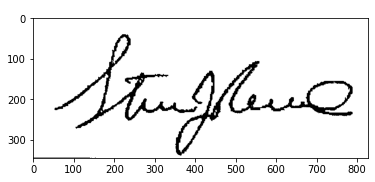

Read text signature: --- 

[278, 2343, 385, 2650, 0.95605266, 3, 'date']


filtering test
['10/20/2020']
filtering test


word_1
['1', '0', '/', '2', '0', '/', '2', '0', '2', '0']


final_text test
 10/20/2020
final_text test




filtering test
['10/20/2020']
filtering test


word_1
['1', '0', '/', '2', '0', '/', '2', '0', '2', '0']


final_text test
 10/20/2020
final_text test




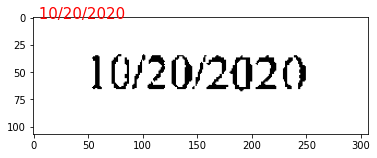

Read text date: --- 10/20/2020

[1030, 961, 1132, 1475, 0.9484241, 5, 'ABArouting']


filtering test
['HOULLESLA', 'A']
filtering test


word_1
['H', 'O', 'U', 'L', 'L', 'E', 'S', 'L', 'A']
word_1
['A']


final_text test
  
final_text test




filtering test
['HOULLESLA', 'A']
filtering test


word_1
['H', 'O', 'U', 'L', 'L', 'E', 'S', 'L', 'A']
word_1
['A']


final_text test
  
final_text test




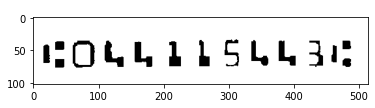

Read text ABArouting: --- 

[407, 2523, 538, 2835, 0.90811473, 2, 'amountNumber']


filtering test
['$48,975.61']
filtering test


word_1
['$', '4', '8', ',', '9', '7', '5', '.', '6', '1']


final_text test
 48,975.61
final_text test




filtering test
['$48,975.61']
filtering test


word_1
['$', '4', '8', ',', '9', '7', '5', '.', '6', '1']


final_text test
 48,975.61
final_text test




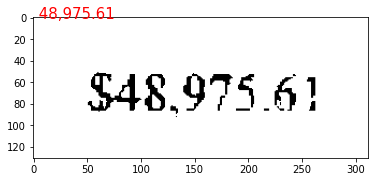

Read text amountNumber: --- 48,975.61

[549, 2461, 647, 2859, 0.8970064, 4, 'validPeriod']


filtering test
['Void', 'After', '180', 'Days']
filtering test


word_1
['V', 'o', 'i', 'd']
word_1
['A', 'f', 't', 'e', 'r']
word_1
['1', '8', '0']
word_1
['D', 'a', 'y', 's']


final_text test
   180 
final_text test




filtering test
['Void', 'After', '180', 'Days']
filtering test


word_1
['V', 'o', 'i', 'd']
word_1
['A', 'f', 't', 'e', 'r']
word_1
['1', '8', '0']
word_1
['D', 'a', 'y', 's']


final_text test
   180 
final_text test




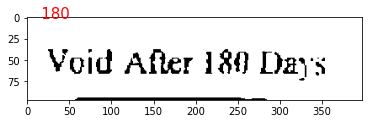

Read text validPeriod: --- 180

[491, 293, 588, 1997, 0.34226033, 1, 'amountWord']


filtering test
['.', 'Forty-Eight', 'Thousand', 'Nine', 'Hundred', 'Seventy-Five', 'Dollars', 'and', 'Sixty-One', 'Cents']
filtering test


word_1
['.']
word_1
['F', 'o', 'r', 't', 'y', '-', 'E', 'i', 'g', 'h', 't']
word_1
['T', 'h', 'o', 'u', 's', 'a', 'n', 'd']
word_1
['N', 'i', 'n', 'e']
word_1
['H', 'u', 'n', 'd', 'r', 'e', 'd']
word_1
['S', 'e', 'v', 'e', 'n', 't', 'y', '-', 'F', 'i', 'v', 'e']
word_1
['D', 'o', 'l', 'l', 'a', 'r', 's']
word_1
['a', 'n', 'd']
word_1
['S', 'i', 'x', 't', 'y', '-', 'O', 'n', 'e']
word_1
['C', 'e', 'n', 't', 's']


final_text test
  FortyEight Thousand Nine Hundred SeventyFive Dollars and SixtyOne Cents
final_text test




filtering test
['.', 'Forty-Eight', 'Thousand', 'Nine', 'Hundred', 'Seventy-Five', 'Dollars', 'and', 'Sixty-One', 'Cents']
filtering test


word_1
['.']
word_1
['F', 'o', 'r', 't', 'y', '-', 'E', 'i', 'g', 'h', 't']
word_1
['T', 'h', 'o', 'u', 's',

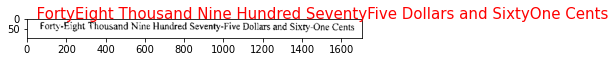

Read text amountWord: --- FortyEight Thousand Nine Hundred SeventyFive Dollars and SixtyOne Cents

_Lemos_1./workspace/training_demo/images/test/lemos/Sample 4.jpg

result_final

{'signature': '', 'date': '10/20/2020', 'ABArouting': '', 'amountNumber': '48,975.61', 'validPeriod': '180', 'amountWord': 'FortyEight Thousand Nine Hundred SeventyFive Dollars and SixtyOne Cents'}

result_final

Sample 5
{1: {'id': 1, 'name': 'amountWord'}, 2: {'id': 2, 'name': 'amountNumber'}, 3: {'id': 3, 'name': 'date'}, 4: {'id': 4, 'name': 'validPeriod'}, 5: {'id': 5, 'name': 'ABArouting'}, 6: {'id': 6, 'name': 'signature'}}
[[338, 2404, 430, 2836, 3, 0.9705129], [655, 2095, 773, 2633, 5, 0.9692555], [1054, 975, 1141, 1481, 4, 0.93666345], [257, 2516, 340, 2812, 2, 0.8868935], [460, 2540, 549, 2813, 1, 0.8229121], [465, 287, 559, 1637, 0, 0.38478288], [559, 2163, 620, 2604, 3, 0.1798798], [338, 2404, 430, 2836, 1, 0.125511], [1053, 974, 1141, 1486, 5, 0.112547584], [338, 2404, 430, 2836, 0, 0.11057836], 

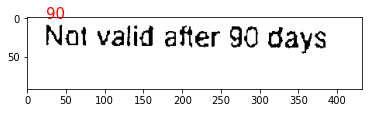

Read text validPeriod: --- 90

[655, 2095, 773, 2633, 0.9692555, 6, 'signature']


filtering test
['“PRE', 'D', 'Ekle']
filtering test


word_1
['“', 'P', 'R', 'E']
word_1
['D']
word_1
['E', 'k', 'l', 'e']


final_text test
   
final_text test




filtering test
['“PRE', 'D', 'Ekle']
filtering test


word_1
['“', 'P', 'R', 'E']
word_1
['D']
word_1
['E', 'k', 'l', 'e']


final_text test
   
final_text test




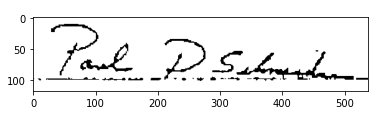

Read text signature: --- 

[1054, 975, 1141, 1481, 0.93666345, 5, 'ABArouting']


filtering test
['mOLWAASA', 'CBE']
filtering test


word_1
['m', 'O', 'L', 'W', 'A', 'A', 'S', 'A']
word_1
['C', 'B', 'E']


final_text test
  
final_text test




filtering test
['mOLWAASA', 'CBE']
filtering test


word_1
['m', 'O', 'L', 'W', 'A', 'A', 'S', 'A']
word_1
['C', 'B', 'E']


final_text test
  
final_text test




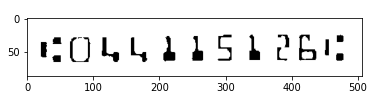

Read text ABArouting: --- 

[257, 2516, 340, 2812, 0.8868935, 3, 'date']


filtering test
['10/16/2020']
filtering test


word_1
['1', '0', '/', '1', '6', '/', '2', '0', '2', '0']


final_text test
 10/16/2020
final_text test




filtering test
['10/16/2020']
filtering test


word_1
['1', '0', '/', '1', '6', '/', '2', '0', '2', '0']


final_text test
 10/16/2020
final_text test




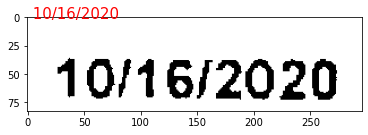

Read text date: --- 10/16/2020

[460, 2540, 549, 2813, 0.8229121, 2, 'amountNumber']


filtering test
['$2,860.28']
filtering test


word_1
['$', '2', ',', '8', '6', '0', '.', '2', '8']


final_text test
 2,860.28
final_text test




filtering test
['$2,860.28']
filtering test


word_1
['$', '2', ',', '8', '6', '0', '.', '2', '8']


final_text test
 2,860.28
final_text test




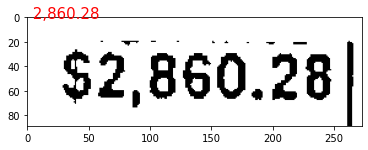

Read text amountNumber: --- 2,860.28

[465, 287, 559, 1637, 0.38478288, 1, 'amountWord']


filtering test
['dqrs', 'apne', 'ee', 'aha', '‘', '*', 'Twe', 'Thousand', 'Eight', 'Hundred', 'Sixty', 'and', '28/10Gths', 'Doll']
filtering test


word_1
['d', 'q', 'r', 's']
word_1
['a', 'p', 'n', 'e']
word_1
['e', 'e']
word_1
['a', 'h', 'a']
word_1
['‘']
word_1
['*']
word_1
['T', 'w', 'e']
word_1
['T', 'h', 'o', 'u', 's', 'a', 'n', 'd']
word_1
['E', 'i', 'g', 'h', 't']
word_1
['H', 'u', 'n', 'd', 'r', 'e', 'd']
word_1
['S', 'i', 'x', 't', 'y']
word_1
['a', 'n', 'd']
word_1
['2', '8', '/', '1', '0', 'G', 't', 'h', 's']
word_1
['D', 'o', 'l', 'l']


final_text test
 dqrs apne ee aha   Te Thousand Eight Hundred Sixty and 2810Gths Doll
final_text test




filtering test
['dqrs', 'apne', 'ee', 'aha', '‘', '*', 'Twe', 'Thousand', 'Eight', 'Hundred', 'Sixty', 'and', '28/10Gths', 'Doll']
filtering test


word_1
['d', 'q', 'r', 's']
word_1
['a', 'p', 'n', 'e']
word_1
['e', 'e']
word_1
['a', 'h', 'a']
w

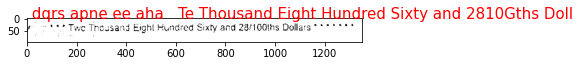

Read text amountWord: --- dqrs apne ee aha   Te Thousand Eight Hundred Sixty and 2810Gths Doll

_Lemos_1./workspace/training_demo/images/test/lemos/Sample 5.jpg

result_final

{'validPeriod': '90', 'signature': '', 'ABArouting': '', 'date': '10/16/2020', 'amountNumber': '2,860.28', 'amountWord': 'dqrs apne ee aha   Te Thousand Eight Hundred Sixty and 2810Gths Doll'}

result_final

Sample 7
{1: {'id': 1, 'name': 'amountWord'}, 2: {'id': 2, 'name': 'amountNumber'}, 3: {'id': 3, 'name': 'date'}, 4: {'id': 4, 'name': 'validPeriod'}, 5: {'id': 5, 'name': 'ABArouting'}, 6: {'id': 6, 'name': 'signature'}}
[[313, 2389, 397, 2827, 3, 0.96733284], [634, 2100, 736, 2611, 5, 0.95526654], [230, 2516, 314, 2796, 2, 0.9398312], [450, 2539, 516, 2785, 1, 0.9286305], [1052, 969, 1132, 1472, 4, 0.9262951], [443, 244, 532, 1671, 0, 0.35013282], [533, 2151, 590, 2596, 3, 0.14921768], [313, 2389, 397, 2827, 0, 0.110781096], [1, 1086, 38, 1373, 2, 0.10797244], [313, 2389, 397, 2827, 1, 0.102109656], [247, 2

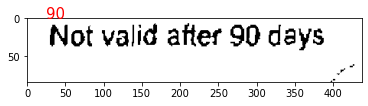

Read text validPeriod: --- 90

[634, 2100, 736, 2611, 0.95526654, 6, 'signature']


filtering test
[]
filtering test




final_text test

final_text test




filtering test
[]
filtering test




final_text test

final_text test




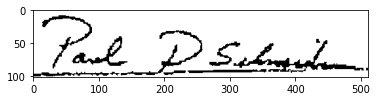

Read text signature: --- 

[230, 2516, 314, 2796, 0.9398312, 3, 'date']


filtering test
['10/23/2020']
filtering test


word_1
['1', '0', '/', '2', '3', '/', '2', '0', '2', '0']


final_text test
 10/23/2020
final_text test




filtering test
['10/23/2020']
filtering test


word_1
['1', '0', '/', '2', '3', '/', '2', '0', '2', '0']


final_text test
 10/23/2020
final_text test




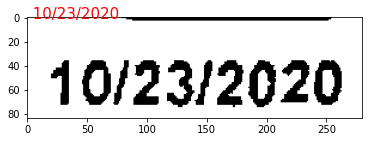

Read text date: --- 10/23/2020

[450, 2539, 516, 2785, 0.9286305, 2, 'amountNumber']


filtering test
['$4,267.70']
filtering test


word_1
['$', '4', ',', '2', '6', '7', '.', '7', '0']


final_text test
 4,267.70
final_text test




filtering test
['$4,267.70']
filtering test


word_1
['$', '4', ',', '2', '6', '7', '.', '7', '0']


final_text test
 4,267.70
final_text test




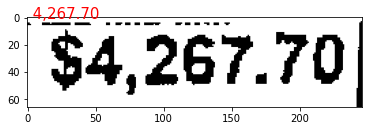

Read text amountNumber: --- 4,267.70

[1052, 969, 1132, 1472, 0.9262951, 5, 'ABArouting']


filtering test
['mOLLAAG', 'UCB']
filtering test


word_1
['m', 'O', 'L', 'L', 'A', 'A', 'G']
word_1
['U', 'C', 'B']


final_text test
  
final_text test




filtering test
['mOLLAAG', 'UCB']
filtering test


word_1
['m', 'O', 'L', 'L', 'A', 'A', 'G']
word_1
['U', 'C', 'B']


final_text test
  
final_text test




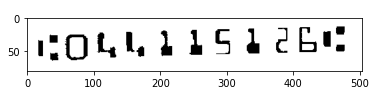

Read text ABArouting: --- 

[443, 244, 532, 1671, 0.35013282, 1, 'amountWord']


filtering test
['tear', 'Four:', 'Thousand', 'Two', 'Hundred', 'Sixty-', '-Sevent', 'and', '70/100ths', 'Dollars', '*']
filtering test


word_1
['t', 'e', 'a', 'r']
word_1
['F', 'o', 'u', 'r', ':']
word_1
['T', 'h', 'o', 'u', 's', 'a', 'n', 'd']
word_1
['T', 'w', 'o']
word_1
['H', 'u', 'n', 'd', 'r', 'e', 'd']
word_1
['S', 'i', 'x', 't', 'y', '-']
word_1
['-', 'S', 'e', 'v', 'e', 'n', 't']
word_1
['a', 'n', 'd']
word_1
['7', '0', '/', '1', '0', '0', 't', 'h', 's']
word_1
['D', 'o', 'l', 'l', 'a', 'r', 's']
word_1
['*']


final_text test
 tear Four Thousand To Hundred Sixty Sevent and 70100ths Dollars 
final_text test




filtering test
['tear', 'Four:', 'Thousand', 'Two', 'Hundred', 'Sixty-', '-Sevent', 'and', '70/100ths', 'Dollars', '*']
filtering test


word_1
['t', 'e', 'a', 'r']
word_1
['F', 'o', 'u', 'r', ':']
word_1
['T', 'h', 'o', 'u', 's', 'a', 'n', 'd']
word_1
['T', 'w', 'o']
word_1
['H', 'u', 'n'

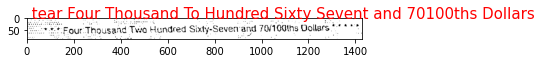

Read text amountWord: --- tear Four Thousand To Hundred Sixty Sevent and 70100ths Dollars

_Lemos_1./workspace/training_demo/images/test/lemos/Sample 7.jpg

result_final

{'validPeriod': '90', 'signature': '', 'date': '10/23/2020', 'amountNumber': '4,267.70', 'ABArouting': '', 'amountWord': 'tear Four Thousand To Hundred Sixty Sevent and 70100ths Dollars'}

result_final

Sample 6
{1: {'id': 1, 'name': 'amountWord'}, 2: {'id': 2, 'name': 'amountNumber'}, 3: {'id': 3, 'name': 'date'}, 4: {'id': 4, 'name': 'validPeriod'}, 5: {'id': 5, 'name': 'ABArouting'}, 6: {'id': 6, 'name': 'signature'}}
[[620, 2130, 782, 2610, 5, 0.98138547], [189, 2158, 257, 2481, 2, 0.9659922], [1060, 904, 1149, 1461, 4, 0.8447418], [315, 2158, 385, 2784, 1, 0.6701529], [258, 1977, 320, 2504, 3, 0.5915095], [774, 54, 846, 1980, 0, 0.28440046], [5, 2764, 107, 2845, 2, 0.14533073], [0, 2785, 89, 2842, 2, 0.12723073], [302, 2019, 377, 2681, 1, 0.11637441], [1056, 1527, 1139, 2084, 4, 0.10897946], [16, 2787, 116, 2840,

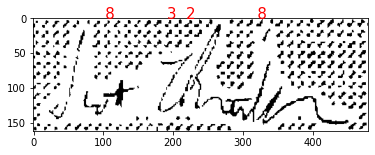

Read text signature: --- 8328

[189, 2158, 257, 2481, 0.9659922, 3, 'date']


filtering test
['10-23-2920']
filtering test


word_1
['1', '0', '-', '2', '3', '-', '2', '9', '2', '0']


final_text test
 10-23-2920
final_text test




filtering test
['10-23-2920']
filtering test


word_1
['1', '0', '-', '2', '3', '-', '2', '9', '2', '0']


final_text test
 10-23-2920
final_text test




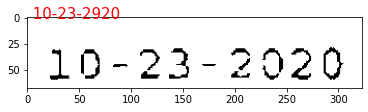

Read text date: --- 10-23-2920

[1060, 904, 1149, 1461, 0.8447418, 5, 'ABArouting']


filtering test
['mOWAPOAB', 'CHIE']
filtering test


word_1
['m', 'O', 'W', 'A', 'P', 'O', 'A', 'B']
word_1
['C', 'H', 'I', 'E']


final_text test
  
final_text test




filtering test
['mOWAPOAB', 'CHIE']
filtering test


word_1
['m', 'O', 'W', 'A', 'P', 'O', 'A', 'B']
word_1
['C', 'H', 'I', 'E']


final_text test
  
final_text test




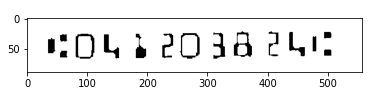

Read text ABArouting: --- 

[315, 2158, 385, 2784, 0.6701529, 2, 'amountNumber']


filtering test
['o', '>', 'tke', 'k', 'kee', 'ee', 'ED', '196.', '32*']
filtering test


word_1
['o']
word_1
['>']
word_1
['t', 'k', 'e']
word_1
['k']
word_1
['k', 'e', 'e']
word_1
['e', 'e']
word_1
['E', 'D']
word_1
['1', '9', '6', '.']
word_1
['3', '2', '*']


final_text test
        196. 32
final_text test




filtering test
['o', '>', 'tke', 'k', 'kee', 'ee', 'ED', '196.', '32*']
filtering test


word_1
['o']
word_1
['>']
word_1
['t', 'k', 'e']
word_1
['k']
word_1
['k', 'e', 'e']
word_1
['e', 'e']
word_1
['E', 'D']
word_1
['1', '9', '6', '.']
word_1
['3', '2', '*']


final_text test
        196. 32
final_text test




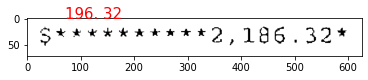

Read text amountNumber: --- 196.32

[258, 1977, 320, 2504, 0.5915095, 4, 'validPeriod']


filtering test
['NOT', 'VALID', 'AFTER', '180', 'DAYS']
filtering test


word_1
['N', 'O', 'T']
word_1
['V', 'A', 'L', 'I', 'D']
word_1
['A', 'F', 'T', 'E', 'R']
word_1
['1', '8', '0']
word_1
['D', 'A', 'Y', 'S']


final_text test
    180 
final_text test




filtering test
['NOT', 'VALID', 'AFTER', '180', 'DAYS']
filtering test


word_1
['N', 'O', 'T']
word_1
['V', 'A', 'L', 'I', 'D']
word_1
['A', 'F', 'T', 'E', 'R']
word_1
['1', '8', '0']
word_1
['D', 'A', 'Y', 'S']


final_text test
    180 
final_text test




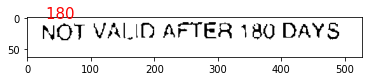

Read text validPeriod: --- 180

[774, 54, 846, 1980, 0.28440046, 1, 'amountWord']


filtering test
['TWO', 'THOUSAND', 'ONE', 'HUNDRED', 'ETGHTY', 'Sik', 'AND', '32/100--']
filtering test


word_1
['T', 'W', 'O']
word_1
['T', 'H', 'O', 'U', 'S', 'A', 'N', 'D']
word_1
['O', 'N', 'E']
word_1
['H', 'U', 'N', 'D', 'R', 'E', 'D']
word_1
['E', 'T', 'G', 'H', 'T', 'Y']
word_1
['S', 'i', 'k']
word_1
['A', 'N', 'D']
word_1
['3', '2', '/', '1', '0', '0', '-', '-']


final_text test
 TO THOUSAND ONE HUNDRED ETGHTY Sik AND 32100
final_text test




filtering test
['TWO', 'THOUSAND', 'ONE', 'HUNDRED', 'ETGHTY', 'Sik', 'AND', '32/100--']
filtering test


word_1
['T', 'W', 'O']
word_1
['T', 'H', 'O', 'U', 'S', 'A', 'N', 'D']
word_1
['O', 'N', 'E']
word_1
['H', 'U', 'N', 'D', 'R', 'E', 'D']
word_1
['E', 'T', 'G', 'H', 'T', 'Y']
word_1
['S', 'i', 'k']
word_1
['A', 'N', 'D']
word_1
['3', '2', '/', '1', '0', '0', '-', '-']


final_text test
 TO THOUSAND ONE HUNDRED ETGHTY Sik AND 32100
final_text test




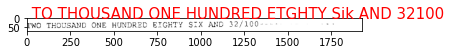

Read text amountWord: --- TO THOUSAND ONE HUNDRED ETGHTY Sik AND 32100

_Lemos_1./workspace/training_demo/images/test/lemos/Sample 6.jpg

result_final

{'signature': '8328', 'date': '10-23-2920', 'ABArouting': '', 'amountNumber': '196.32', 'validPeriod': '180', 'amountWord': 'TO THOUSAND ONE HUNDRED ETGHTY Sik AND 32100'}

result_final



In [ ]:
print(IMAGE_PATHS)


for filename_ in IMAGE_PATHS:
    image_name_new = filename_[filename_.rfind('/')+1:filename_.rfind('.')]
    print(image_name_new)    
    main_(filename_,image_name_new)

In [ ]:
for result in all_results.keys():
    print(all_results[result])
print(all_results)

{'signature': '', 'ABArouting': '7923', 'validPeriod': '3', 'date': '0910/2020', 'amountNumber': '2715853', 'amountWord': 'Y  Tenn seven thousand one hundred fifty eight and 53100 Dollars Pe 79 C7XPrAa rere fF'}
{'signature': '', 'date': '10/20/2020', 'ABArouting': '', 'amountNumber': '48,975.61', 'validPeriod': '180', 'amountWord': 'FortyEight Thousand Nine Hundred SeventyFive Dollars and SixtyOne Cents'}
{'validPeriod': '90', 'signature': '', 'ABArouting': '', 'date': '10/16/2020', 'amountNumber': '2,860.28', 'amountWord': 'dqrs apne ee aha   Te Thousand Eight Hundred Sixty and 2810Gths Doll'}
{'validPeriod': '90', 'signature': '', 'date': '10/23/2020', 'amountNumber': '4,267.70', 'ABArouting': '', 'amountWord': 'tear Four Thousand To Hundred Sixty Sevent and 70100ths Dollars'}
{'signature': '8328', 'date': '10-23-2920', 'ABArouting': '', 'amountNumber': '196.32', 'validPeriod': '180', 'amountWord': 'TO THOUSAND ONE HUNDRED ETGHTY Sik AND 32100'}
{'Sample 3': {'signature': '', 'ABAro